## Q-Learning
#### Librerías

In [36]:
import numpy as np
import gym
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter("ignore")

### Configuración del entorno

In [32]:
env = gym.make('FrozenLake-v1')
Q = np.zeros([env.observation_space.n, env.action_space.n])

### Hiperparámetros del agente

In [33]:
alfa = 0.1
gamma = 0.99
epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.995
num_episodios = 50000

### Entrenamiento

In [34]:
rewards = []
epsilons = []

for i in range(num_episodios):
    state = env.reset()[0] if isinstance(env.reset(), tuple) else env.reset()
    done = False
    total_reward = 0

    while not done:
        if np.random.uniform() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        
        next_state, reward, done, _ = env.step(action)
        Q[state, action] += alfa * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        state = next_state
        total_reward += reward
    
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards.append(total_reward)
    epsilons.append(epsilon)

np.save("Q_table.npy", Q)

## Visualización

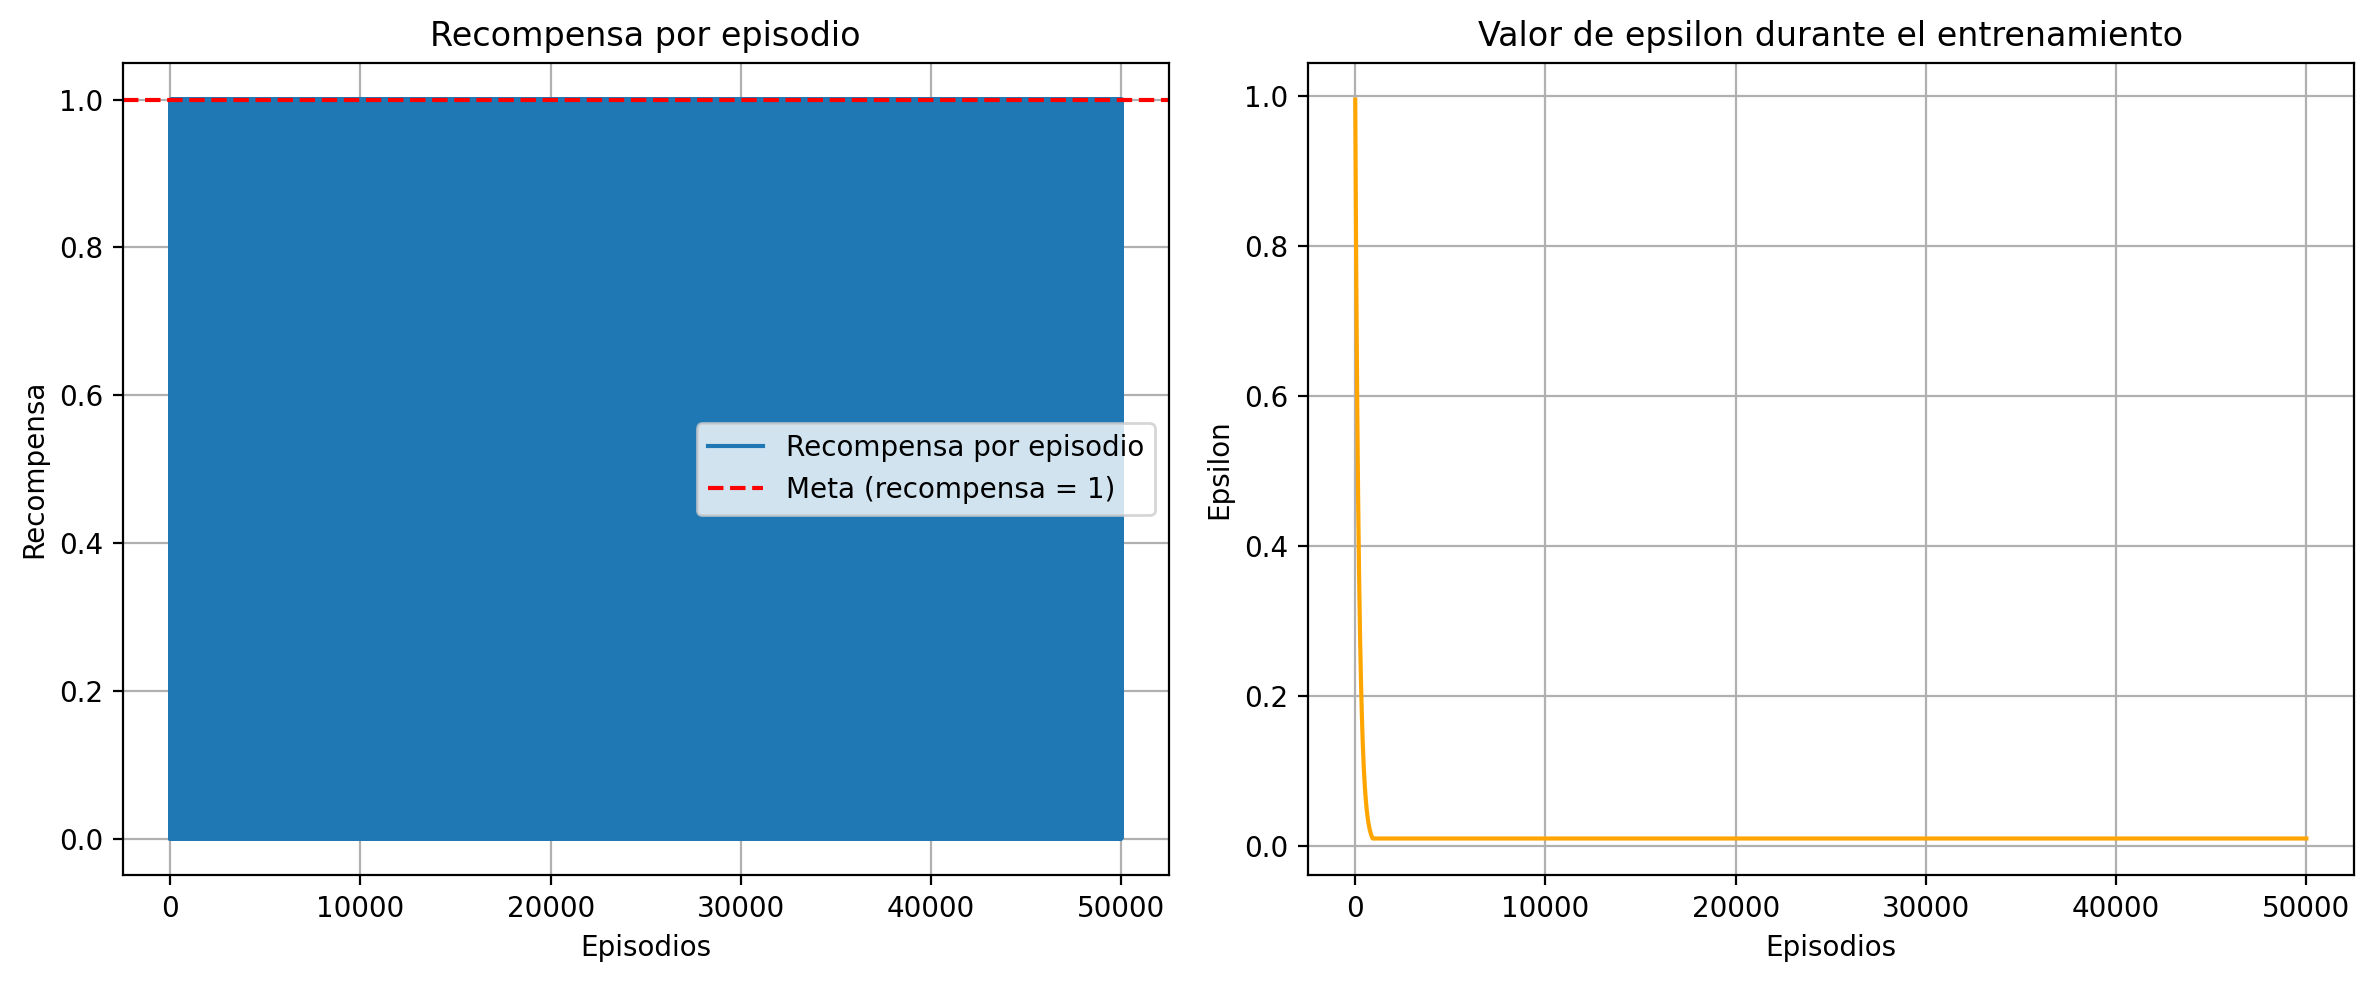

In [37]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rewards, label='Recompensa por episodio')
plt.axhline(y=1, color='r', linestyle='--', label='Meta (recompensa = 1)')
plt.title('Recompensa por episodio')
plt.xlabel('Episodios')
plt.ylabel('Recompensa')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epsilons, color='orange')
plt.title('Valor de epsilon durante el entrenamiento')
plt.xlabel('Episodios')
plt.ylabel('Epsilon')
plt.grid(True)

plt.tight_layout()
plt.show()

### Prueba

In [38]:
env_video = gym.make('FrozenLake-v1', render_mode='rgb_array')
env_video = gym.wrappers.RecordVideo(env_video, video_folder="videos", name_prefix="Agente_entrenado")

state = env_video.reset()
done = False
while not done:
    action = np.argmax(Q[state, :])
    next_state, reward, done, _ = env_video.step(action)
    state = next_state

env_video.close()

In [39]:
from IPython.display import Video
Video("videos/Agente_entrenado-episode-0.mp4",embed=True)